# **Machine Learning from Data**

## Lab 1: MAP and Gaussian data - Part 2

2021 - 2023 - Veronica Vilaplana - [GPI @ IDEAI](https://imatge.upc.edu/web/) Research group

-----------------

##Classification criteria based on maximizing the posterior probability

##Part2: Eigenvalues of the covariance matrix and cluster shape
In this second part we will work with the QPSK modulation. Therefore, we have a classification problem with four classes and two features per class.

We will consider two cases: covariances of all classes identical but arbitrary (case 2 studied in class) and different covariant matrices(case 3).

In [31]:
import pandas as pd             #import pandas with the alias pd
import numpy as np              #import numpy with the alias np
import seaborn as sns           #import seaborn with the alias sns
import scipy.stats as ss
import matplotlib.pyplot as plt #import matplotlib.pyplot with the alias plt
from numpy.random import default_rng
# initialize a random seed such that every execution will raise same random sequences of results
rng = default_rng(seed=5)


#1. Data generation

###Parameter initialization

The parameter $\sigma$ will be derived from the desired SNR, given as input:

In [32]:
# Input a SNR value:
SNR = 10
#SNR = 5

# Design parameters
dist=1.                # distance between classes mean
n_classes = 4          # number of classes
n_samples = 1000;      # number of samples per class
n_feat = 2             # number of features per class

To switch between case 2 and case 3, comment or un-comment the following lines

In each case, you can change the value of `ro`

In [33]:
ro = [0, 0, 0, 0 ]          # CASE 2
#ro = [0.5, 0.5, 0.5, 0.5]  # CASE 2
#ro=[0.5, 0, -0.5, 0.8]     # CASE 3

In [34]:
 # M_Means matrix containing the QPSK mean vectors
M_Means = 0.5 * dist * np.array([[1, 1],[1, -1], [-1, 1], [-1,-1]])

# Energy computation
energy = 0
for i in range(0,n_classes):
  energy = energy + np.dot(M_Means[i],M_Means[i])
energy = energy / n_classes

# Noise variance computation
SNR = 10 ** (SNR/10)
sig = energy / SNR
#sig = sig / n_feat

M_covar = np.zeros(shape=(4,2,2))
sigma = sig * np.array([1,1,1,1])
for i in range(0,n_classes):
  M_covar[i,:,:] = sigma[i] / n_feat * np.array([[1, ro[i]],[ro[i],1]])

print(sigma)
print(M_covar)


[0.05 0.05 0.05 0.05]
[[[0.025 0.   ]
  [0.    0.025]]

 [[0.025 0.   ]
  [0.    0.025]]

 [[0.025 0.   ]
  [0.    0.025]]

 [[0.025 0.   ]
  [0.    0.025]]]


###Dataset generation

In [35]:
# Dataset Generation
# labels is a 1D array with 0-1 int labels
# xdata is a 2D array (columns = features, rows= samples) with random numbers
xdata = np.empty((0,n_feat), float)
labels = np.empty((0), int)
for i in range(0,n_classes):
  ydata = rng.multivariate_normal(mean=M_Means[i,:], cov= M_covar[i,:,:], size= n_samples)
  ylabels = i * np.ones((n_samples),dtype=int)
  xdata = np.append(xdata, ydata, axis=0)
  labels = np.append(labels, ylabels, axis=0)

# shuffle data (xdata and labels, same order)
rp = np.random.permutation(len(xdata))
xdatas = xdata[rp]
xlabs  = labels[rp]

print(np.shape(xdatas))
print(np.shape(xlabs))

(4000, 2)
(4000,)


###Scatter plot

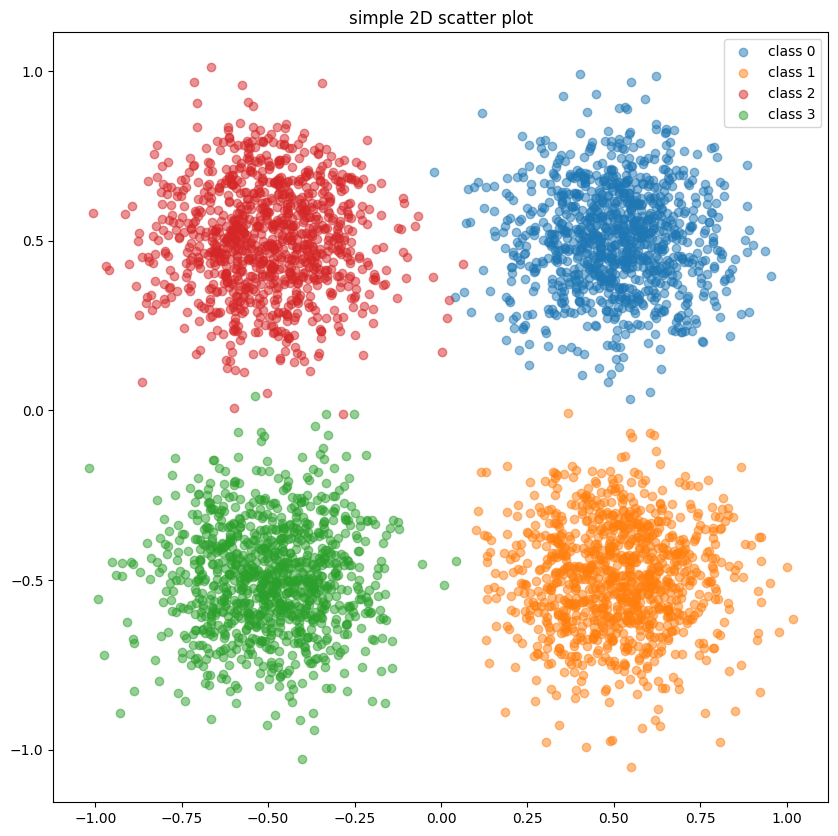

In [36]:
# 2D scatter plot (not interactive in colab!)

fig, ax = plt.subplots(figsize = (10,10))
#ax = fig.add_subplot(111, projection='3d')
col = ['tab:blue','tab:orange','tab:red','tab:green']
for idclass in range(0, n_classes):
  idx = xlabs==idclass
  plt.scatter(xdatas[idx,0], xdatas[idx,1], color = col[idclass], label='class %d' %idclass,alpha=0.5);

plt.title("simple 2D scatter plot")
plt.legend()
plt.show()

#2. LDA and QDA Classifiers
We fit the models and evaluate them on the training data

In [37]:
# Create a linear discriminant analysis classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_train = xdatas
y_train = xlabs

# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(solver="svd",store_covariance=True)
ldamodel = lda.fit(X_train, y_train)
y_tpred_lda = ldamodel.predict(X_train)

print('LDA model priors:',ldamodel.priors_)
print('LDA model means:',ldamodel.means_)
print('LDA models covariance:', ldamodel.covariance_)


linear_error = 1. - accuracy_score(y_train,y_tpred_lda)
print('LDA error: %f' %linear_error)
print('LDA confusion matrix:')
print(confusion_matrix(y_train,y_tpred_lda))


# Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qdamodel = qda.fit(X_train, y_train)
y_tpred_qda = qdamodel.predict(X_train)

print('QDA model priors:',qdamodel.priors_)
print('QDA model means:',qdamodel.means_)
print('QDA models covariances:', qdamodel.covariance_)

qda_error = 1. - accuracy_score(y_train,y_tpred_qda)
print('QDA error: %f' %qda_error)
print('QDA confusion matrix:')
print(confusion_matrix(y_train,y_tpred_qda))



LDA model priors: [0.25 0.25 0.25 0.25]
LDA model means: [[ 0.50322188  0.50442165]
 [ 0.50836109 -0.49587292]
 [-0.50210708  0.50336684]
 [-0.49582473 -0.49706698]]
LDA models covariance: [[ 0.02558407 -0.00018018]
 [-0.00018018  0.0249871 ]]
LDA error: 0.002250
LDA confusion matrix:
[[ 999    0    1    0]
 [   0 1000    0    0]
 [   4    0  995    1]
 [   0    2    1  997]]
QDA model priors: [0.25 0.25 0.25 0.25]
QDA model means: [[ 0.50322188  0.50442165]
 [ 0.50836109 -0.49587292]
 [-0.50210708  0.50336684]
 [-0.49582473 -0.49706698]]
QDA models covariances: [array([[ 0.02460758, -0.00046853],
       [-0.00046853,  0.02354906]]), array([[ 0.02627852, -0.00013184],
       [-0.00013184,  0.02551429]]), array([[ 0.02600212, -0.00058692],
       [-0.00058692,  0.02553453]]), array([[0.0255505 , 0.00046587],
       [0.00046587, 0.02545059]])]
QDA error: 0.002000
QDA confusion matrix:
[[ 999    0    1    0]
 [   0 1000    0    0]
 [   3    0  996    1]
 [   0    2    1  997]]


### Decision boundaries for the lineal model
For the lineal classifier we can plot the decision boundaries.
In a multiclass problem like this, this is a one vs. all classifier, so hyperplanes show the boundary between each class agaist all the others.

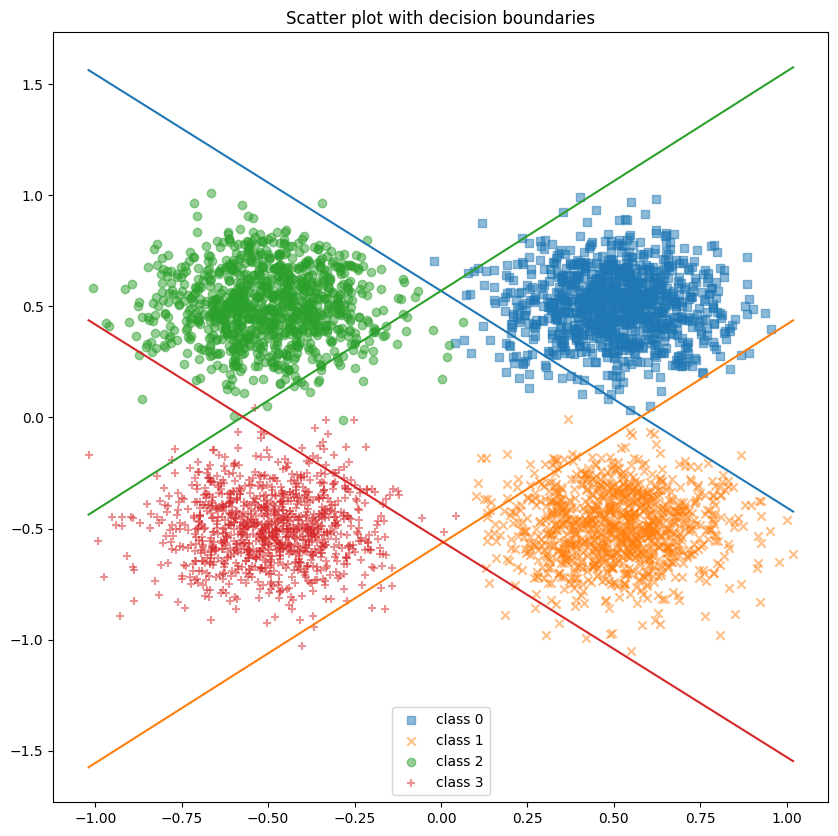

In [38]:
# coef_ : shape of (n_classes, n_features)
# intercept_ :  shape of (n_classes,)

# Plot the hyperplanes: one vs all
fig, ax = plt.subplots(figsize = (10,10))

col = ['tab:blue','tab:orange','tab:green','tab:red']

for l,c, m in zip(np.unique(y_train),col,['s','x','o','+']):
    plt.scatter(X_train[y_train==l,0],
                X_train[y_train==l,1],
                c=c, marker=m,label='class %d' %l, alpha=0.5)
# marker=m
x1 = np.array([np.min(X_train[:,0], axis=0), np.max(X_train[:,0], axis=0)])

# lines for class 0
for i, c in enumerate(col):
    b, w1, w2 = lda.intercept_[i], lda.coef_[i][0], lda.coef_[i][1]
    y1 = -(b+x1*w1)/w2
    plt.plot(x1,y1,c=c)

plt.title("Scatter plot with decision boundaries")
plt.legend()
plt.show()

###Plotting decision regions
We can make a different plot, where we classify all points on a 2D region around the sample data (labels are presented with different colors) and show a scatter plot of the sample (labels represented with different colors).

We make this plot for the linear and for the quadratic models.

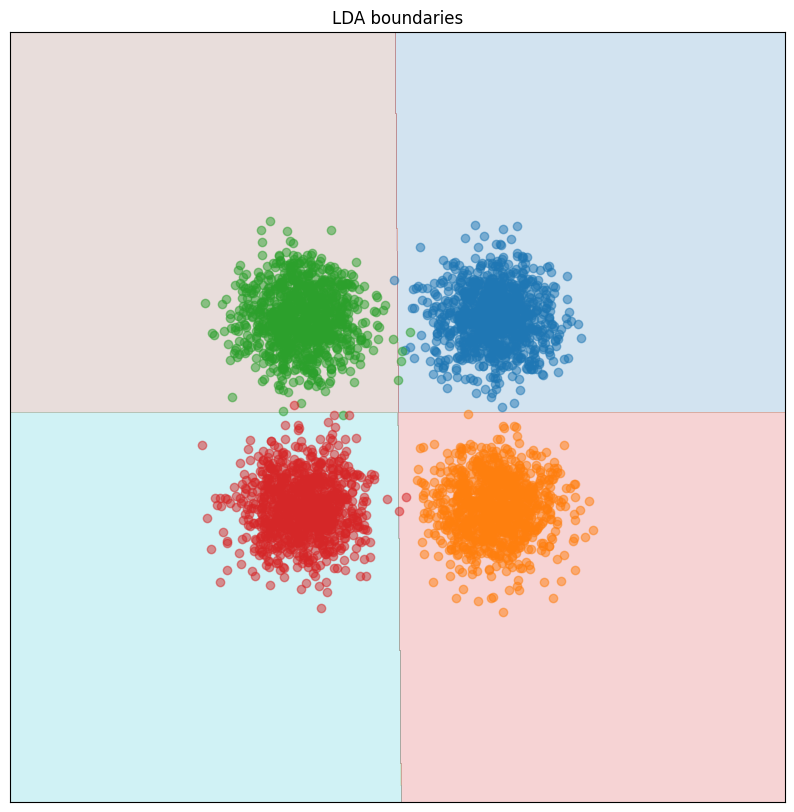

In [39]:
# For the lineal model

X = X_train
y = y_train
h = .001 # step size in the mesh


col = ['tab:blue','tab:orange','tab:green','tab:red']
#for idclass in range(0, n_classes):
#  idx = xlabs==idclass
#  plt.scatter(xdatas[idx,0], xdatas[idx,1], color = col[idclass], label='class %d' %idclass,alpha=0.5);


# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig, ax = plt.subplots(figsize = (10,10))

Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#plt.contourf(xx, yy, Z, colors = col, alpha=0.5)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.2)

# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
for idclass in range(0, n_classes):
  idx = xlabs==idclass
  plt.scatter(xdatas[idx,0], xdatas[idx,1], color = col[idclass], label='class %d' %idclass,alpha=0.5);


plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('LDA boundaries')

plt.show()

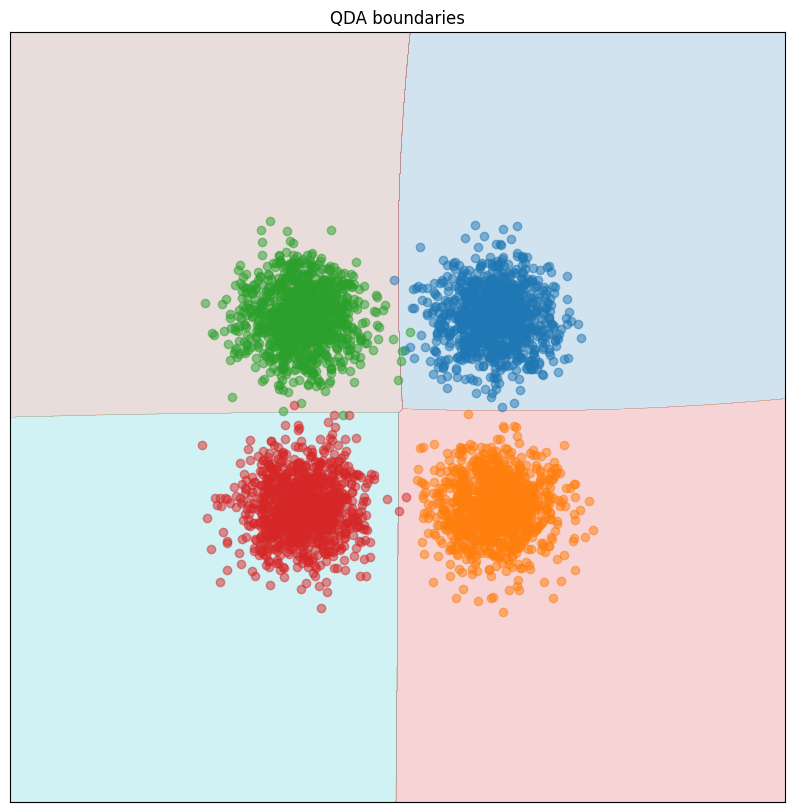

In [40]:
# For the quadratic model

X = X_train
y = y_train
h = .001 # step size in the mesh


col = ['tab:blue','tab:orange','tab:green','tab:red']
#for idclass in range(0, n_classes):
#  idx = xlabs==idclass
#  plt.scatter(xdatas[idx,0], xdatas[idx,1], color = col[idclass], label='class %d' %idclass,alpha=0.5);


# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig, ax = plt.subplots(figsize = (10,10))

Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#plt.contourf(xx, yy, Z, colors = col, alpha=0.5)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.2)

# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
for idclass in range(0, n_classes):
  idx = xlabs==idclass
  plt.scatter(xdatas[idx,0], xdatas[idx,1], color = col[idclass], label='class %d' %idclass,alpha=0.5);


plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('QDA boundaries')

plt.show()